# LSTM vs Bidirectional RNN for Sequence Classification

Here we are going to see a performance between LSTM and bidirectional RNN on the random sample of 40 on the values between 0 and 1

## First we ll see LSTM

In [10]:
#import libraries
from random import random
import numpy as np

In [24]:
#create a random sequence of random numbers in numbers between 0 and 1
n_timestamps = 40
X = np.array([random.random() for i in range(n_timestamps)])

In [25]:
X

array([0.24224683, 0.90247973, 0.22888282, 0.32744559, 0.365284  ,
       0.34273668, 0.21649697, 0.56779549, 0.27803932, 0.61612096,
       0.50249078, 0.72950208, 0.80099937, 0.12972209, 0.13676715,
       0.86398985, 0.13678479, 0.82160271, 0.34744213, 0.06157255,
       0.18973478, 0.39160048, 0.24169767, 0.55420718, 0.7926245 ,
       0.05137849, 0.74981635, 0.80450795, 0.36026037, 0.08678525,
       0.52434072, 0.68978711, 0.97293216, 0.9897126 , 0.72777358,
       0.20377802, 0.36755699, 0.31042071, 0.90653672, 0.64307137])

We can define the threshold as the one-quarter the length of the input sequence

In [26]:
#threshold
limit = n_timestamps/4.0
print(limit)

10.0


We then calculate the output_sequence as whether each cumulative sum value exceeds the threshold value. (i.e.,) y could be the values of 0 and once it surpass the value of threshold it will change to 1 . cumsum is defined as [pos1 pos1+pos2 pos1+pos2+pos3 ...]

In [27]:
#determine the class outcome for each item in cumulative sequence
y = np.array([0 if x<limit else 1 for x in np.cumsum(X)])

In [20]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [28]:
print(X.shape)
print(y.shape)

(40,)
(40,)


In [31]:
#reshaping input and output data to be suitable for LSTM
X = X.reshape(1, n_timestamps, 1)
y = y.reshape(1, n_timestamps, 1)
print(X.shape)
print(y.shape)

(1, 40, 1)
(1, 40, 1)


We can see that shape of the X and y are reshaped into (1,40,1)

## Define the model

In [59]:
#importing libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [60]:
#callbacks
checkpoint = ModelCheckpoint(filepath=r'D:\\Backup_of_exact_MY_REPO\\model Weights\\bidirectionalRNN.h5', 
                             monitor='loss', save_best_only= True)

EarlyStopping = EarlyStopping(monitor='loss', min_delta=0.001, patience=3, restore_best_weights=True)

callbacks = [checkpoint, EarlyStopping]

In [61]:
model = Sequential()
model.add(LSTM(units =20, input_shape=(40,1), return_sequences=True))
model.add(LSTM(units=20, return_sequences=True))
model.add(TimeDistributed(Dense(units=1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['acc'])

The first hidden layer and second hidden layer will have 20 memory units  each and the output layer will be a fully connected layer that outputs one value per timestep. A sigmoid activation function is used on the output to predict the binary value.

A TimeDistributed wrapper layer is used around the output layer so that one value per timestep can be predicted given the full sequence provided as input. This requires that the LSTM hidden layer returns a sequence of values (one per timestep) rather than a single value for the whole input sequence.

## Fit the model

In [62]:
model.fit(X, y, epochs=50, batch_size=1, verbose=1, callbacks=callbacks)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.6960 - acc: 0.6000
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 0.6951 - acc: 0.6000
Epoch 3/50
1/1 [==============================] - 0s 40ms/step - loss: 0.6940 - acc: 0.6000
Epoch 4/50
1/1 [==============================] - 0s 40ms/step - loss: 0.6929 - acc: 0.6000
Epoch 5/50
1/1 [==============================] - 0s 48ms/step - loss: 0.6919 - acc: 0.6000
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 0.6908 - acc: 0.6000
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 0.6898 - acc: 0.6000
Epoch 8/50
1/1 [==============================] - 0s 44ms/step - loss: 0.6888 - acc: 0.6000
Epoch 9/50
1/1 [==============================] - 0s 40ms/step - loss: 0.6878 - acc: 0.6000
Epoch 10/50
1/1 [==============================] - 0s 36ms/step - loss: 0.6867 - acc: 0.6000
Epoch 11/50
1/1 [==============================] - 0s 44ms/step - loss: 0.6856 - 

In [64]:
pred_lstm = model.predict_classes(X, verbose=1)

1/1 [==============================] - 1s 804ms/step


In [66]:
for i in range(n_timestamps):
    print('Expected:', y[0, i], 'Predicted:', pred_lstm[0,i])

Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] 

# Now we ll see Bidirectional RNN

Now that we know how to develop an LSTM for the sequence classification problem, we can extend the example to demonstrate a Bidirectional LSTM.

We can do this by wrapping the LSTM hidden layer with a Bidirectional layer, as follows:


model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))



This will create two copies of the hidden layer, one fit in the input sequences as-is and another one on a reversed copy of the input sequence. By default, the output values from these LSTMs will be concatenated.

That means that instead of the TimeDistributed layer receiving 40 timesteps of 20 outputs, it will now receive 40 timesteps of 40 (20 units + 20 units) outputs.

## Build a model

In [70]:
#import libraries
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [68]:
model_1 = Sequential()
model_1.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timestamps, 1)))
model_1.add(TimeDistributed(Dense(1, activation='sigmoid')))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [71]:
#callbacks
checkpoint_brnn = ModelCheckpoint(filepath=r'D:\\Backup_of_exact_MY_REPO\\model Weights\\bidirectionalRNN_1.h5',
                                 monitor='loss', save_best_only=True)

EarlyStopping_brnn = EarlyStopping(monitor='loss', min_delta=0.001, patience=3, restore_best_weights=True)

## Fit the Model

In [72]:
model_1.fit(X, y, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.6943 - acc: 0.4000
Epoch 2/50
1/1 [==============================] - 0s 47ms/step - loss: 0.6923 - acc: 0.4000
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 0.6904 - acc: 0.4250
Epoch 4/50
1/1 [==============================] - 0s 50ms/step - loss: 0.6885 - acc: 0.6750
Epoch 5/50
1/1 [==============================] - 0s 48ms/step - loss: 0.6867 - acc: 0.8000
Epoch 6/50
1/1 [==============================] - 0s 68ms/step - loss: 0.6850 - acc: 0.7750
Epoch 7/50
1/1 [==============================] - 0s 50ms/step - loss: 0.6833 - acc: 0.6750
Epoch 8/50
1/1 [==============================] - 0s 58ms/step - loss: 0.6816 - acc: 0.6250
Epoch 9/50
1/1 [==============================] - 0s 58ms/step - loss: 0.6799 - acc: 0.6000
Epoch 10/50
1/1 [==============================] - 0s 83ms/step - loss: 0.6783 - acc: 0.6000
Epoch 11/50
1/1 [==============================] - 0s 47ms/step - loss: 0.6766 - 

In [75]:
pred_brnn = model_1.predict_classes(X, batch_size=1, verbose=2)

In [76]:
for i in range(n_timestamps):
    print('Expected:', y[0, i], 'Predicted:', pred_brnn[0,i])

Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [0] Predicted: [0]
Expected: [1] Predicted: [0]
Expected: [1] Predicted: [0]
Expected: [1] Predicted: [0]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] Predicted: [1]
Expected: [1] 

# Compare LSTM to Bidirectional LSTM

In this example, we will compare the performance of traditional LSTMs to a Bidirectional LSTM over time while the models are being trained.

We will adjust the experiment so that the models are only trained for 250 epochs. This is so that we can get a clear idea of how learning unfolds for each model and how the learning behavior differs with bidirectional LSTMs.

We will compare three different models; specifically:

1.LSTM (as-is)

2.LSTM with reversed input sequences (e.g. you can do this by setting the “go_backwards” argument to he LSTM layer to “True”)

3.Bidirectional LSTM

This comparison will help to show that bidirectional LSTMs can in fact add something more than simply reversing the input sequence.

In [84]:
# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = np.array([random.random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = np.array([0 if x < limit else 1 for x in np.cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y
 
def get_lstm_model(n_timesteps, backwards):
	model = Sequential()
	model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
def get_bi_lstm_model(n_timesteps, mode):
	model = Sequential()
	model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
def train_model(model, n_timesteps):
	loss = list()
	for _ in range(250):
		# generate new random sequence
		X,y = get_sequence(n_timesteps)
		# fit model for one epoch on this sequence
		hist = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
		loss.append(hist.history['loss'][0])
	return loss

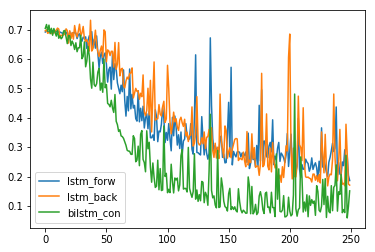

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
n_timesteps = 40
results = pd.DataFrame()

# lstm forwards
model = get_lstm_model(n_timesteps, False)
results['lstm_forw'] = train_model(model, n_timesteps)

# lstm backwards
model = get_lstm_model(n_timesteps, True)
results['lstm_back'] = train_model(model, n_timesteps)

# bidirectional concat
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)

# line plot of results
results.plot()
plt.show()

In [89]:
results

,lstm_forw,lstm_back,bilstm_con
0,0.691509,0.695652,0.703850
1,0.697886,0.698879,0.716963
2,0.692830,0.686899,0.694019
3,0.690912,0.690516,0.714876
4,0.697911,0.689919,0.685776
5,0.692449,0.685977,0.704016
6,0.696388,0.691900,0.680495
7,0.693224,0.687758,0.703338
8,0.693444,0.693810,0.689867
9,0.692509,0.697966,0.677640


We can see that the loss has been comparably reduced in Bidirectional RNN by merging when compared to normal LSTM. Bidirectional RNN cannot be used all the time but it is a good one to learn the sequence model

# That's the end of the code